# Verovatnoća da dvoje iz grupe ljudi veličine n ima rođendan istog datuma
Treba da proverimo koja je verovatnoća da su od k osoba barem 2 osobe rodjene istog datuma u toku godine. Rešenje simulacijom treba da konvergira ka teorijskom rešenju kako se povećava broj iteracija.

In [17]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt


def verovatnoca_za_n_ljudi(n):
    P = 1-(math.factorial(365)/(math.factorial(365-n)*365**n))
    return P*100

In [2]:
n=2 # verovatnoca za dvoje ljudi u %
verovatnoca_za_n_ljudi(2)

0.2739726027397249

In [3]:
# verovatnoca za dvoje ljudi u %
verovatnoca_za_n_ljudi(3)

0.8204165884781345

### Rešenje simulacijom

In [5]:
dani=np.arange(1,366,1).tolist() # generisemo listu od 365 dana iz koje cemo vrsiti slucajne izbore

In [25]:
random.seed(123)

def simulacija_verovatnoce_rodjendana(broj_ljudi, broj_iteracija):
    
    count_isti_datum = 0
    for i in range(broj_iteracija):
        rodjendani = [0]*broj_ljudi
        for covek in range(0,broj_ljudi):
            rodjendani[covek] = random.choice(dani) # u listu appendujemo nasumicno generisani rodjendan za svakog coveka
        if len(set(rodjendani)) < len(rodjendani):  # proveravamo da li su izvucena barem dva ista rodjendana (tj. isti dani)
            count_isti_datum+=1
#     print(f'% rodjendana istog datuma, za {broj_ljudi} coveka :', (count_isti_datum/broj_iteracija)*100, '%')
    return (count_isti_datum/broj_iteracija)*100

In [15]:
#verovatnoca za dvoje ljudi za 100000 iteracija, trebalo bi da tezi teorijskoj verovatnoci
simulacija_verovatnoce_rodjendana(2, 10000)

% rodjendana istog datuma, za 2 coveka : 0.24 %


0.24

In [16]:
simulacija_verovatnoce_rodjendana(3, 10000)

% rodjendana istog datuma, za 3 coveka : 0.7799999999999999 %


0.7799999999999999

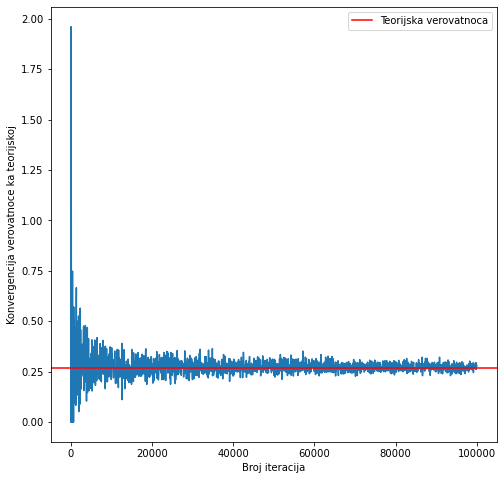

In [28]:
verovatnoce = []
iteracije = np.arange(1,100000,50).tolist()
for iter_ in iteracije:
    rezultat = simulacija_verovatnoce_rodjendana(2,iter_)
    verovatnoce.append(rezultat)
        


plt.figure(figsize=(8,8))
plt.plot(iteracije, verovatnoce)
plt.axhline(0.27, label='Teorijska verovatnoca', color='red')
plt.xlabel('Broj iteracija')
plt.ylabel('Konvergencija verovatnoce ka teorijskoj')
plt.legend();